# Mini Project 1 - Linear Regression

* You are expected to perform linear regression on the load_diabetes() dataset from sklearn.datasets.
* Hints are provided at the cells below that may help you with your project.
* You may try extra things given that you complete the trainings and predictions parts.

In [68]:
# import required modules and classes for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

In [69]:
# load data
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [70]:
# Familiarize yourself with the dataset (Data Exploration)
# What are the features and target?
print(dir(diabetes))
print(diabetes.feature_names)
features = diabetes['data']
targets = diabetes['target']

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [71]:
# EDA
df = pd.DataFrame(data=features, columns=diabetes.feature_names)
df['Progress'] = targets
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Progress  
0 -0.002592  0.019907 -0.017646     151.0  
1 -0.039493 -0.068332 -0.092204      75.0  
2 -0.002592  0.002861 -0.025930     141.0  
3  0.034309  0.022688 -0.009362     206.0  
4 -0.002592 -0.031988 -0.046641     135.0  


In [72]:
## Data size
print(features.shape, targets.shape)

(442, 10) (442,)


In [73]:
## Describing data
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -1.444295e-18  2.543215e-18 -2.255925e-16 -4.854086e-17 -1.428596e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.898811e-17 -6.028360e-18 -1.788100e-17  9.243486e-17  1.351770e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

In [74]:
# Data cleaning
## Null values
print(df.isna().sum())

age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
Progress    0
dtype: int64


In [75]:
## Duplicates
print(df[df.duplicated()].shape)
print(df[~df.duplicated()].shape)

(0, 11)
(442, 11)


In [76]:
## Data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       442 non-null    float64
 1   sex       442 non-null    float64
 2   bmi       442 non-null    float64
 3   bp        442 non-null    float64
 4   s1        442 non-null    float64
 5   s2        442 non-null    float64
 6   s3        442 non-null    float64
 7   s4        442 non-null    float64
 8   s5        442 non-null    float64
 9   s6        442 non-null    float64
 10  Progress  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [77]:
# Data correlation
corr = df.corr()
print(corr)

               age       sex       bmi        bp        s1        s2  \
age       1.000000  0.173737  0.185085  0.335428  0.260061  0.219243   
sex       0.173737  1.000000  0.088161  0.241010  0.035277  0.142637   
bmi       0.185085  0.088161  1.000000  0.395411  0.249777  0.261170   
bp        0.335428  0.241010  0.395411  1.000000  0.242464  0.185548   
s1        0.260061  0.035277  0.249777  0.242464  1.000000  0.896663   
s2        0.219243  0.142637  0.261170  0.185548  0.896663  1.000000   
s3       -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455   
s4        0.203841  0.332115  0.413807  0.257650  0.542207  0.659817   
s5        0.270774  0.149916  0.446157  0.393480  0.515503  0.318357   
s6        0.301731  0.208133  0.388680  0.390430  0.325717  0.290600   
Progress  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054   

                s3        s4        s5        s6  Progress  
age      -0.075181  0.203841  0.270774  0.301731  0.187889  
sex      -0.3

<AxesSubplot:>

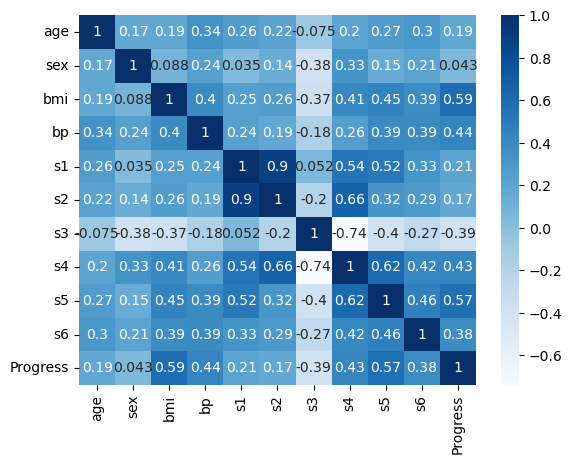

In [78]:
sns.heatmap(corr, cmap='Blues', annot=True)

In [79]:
# Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=12345)

In [80]:
# Setting up the model object
linreg = LinearRegression()

In [81]:
# Perform model training using train dataset from the split
linreg.fit(X_train, y_train)

LinearRegression()

In [82]:
# Check the values of weights and biases of the Linear Regression model
weight = pd.DataFrame(data=linreg.coef_, index=diabetes.feature_names)
bias = linreg.intercept_
print('Weight: {}\nBias: {}'.format(weight, bias))

Weight:               0
age  -79.876758
sex -240.863375
bmi  503.683218
bp   320.977486
s1  -910.801444
s2   577.515872
s3   131.460779
s4   217.839449
s5   783.976062
s6    72.412085
Bias: 152.42829553709188


In [83]:
# Perform prediction using the Test data (choose the relevant test data)
y_pred = linreg.predict(X_test)

In [84]:
# Find out the score of the model
linreg.score(X_test, y_test)

0.5514331593226025

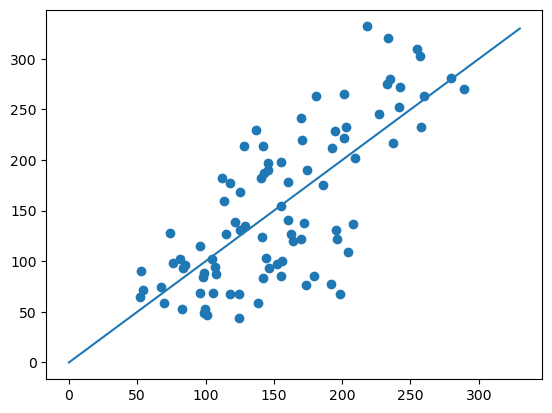

In [85]:
# Plot a scatter plot of prediction against test data (choose the relevant test data)
plt.scatter(y_pred, y_test)
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [86]:
# Print RMSE, MSE and MAE values
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

RMSE: 51.243860872662445
MSE: 2625.9332771367854
MAE: 42.08421465004936


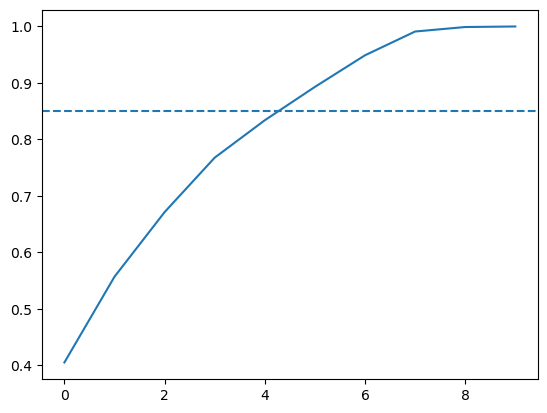

In [87]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train, y_train)
pca_variance = pca.explained_variance_ratio_
pca_variance_cumsum = pca_variance.cumsum()

plt.plot(range(len(pca_variance_cumsum)), pca_variance_cumsum)
plt.axhline(0.85, linestyle='--')
plt.show()

In [88]:
pca2 = PCA(n_components=5)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca = pca2.transform(X_test)

0.5359928306742061


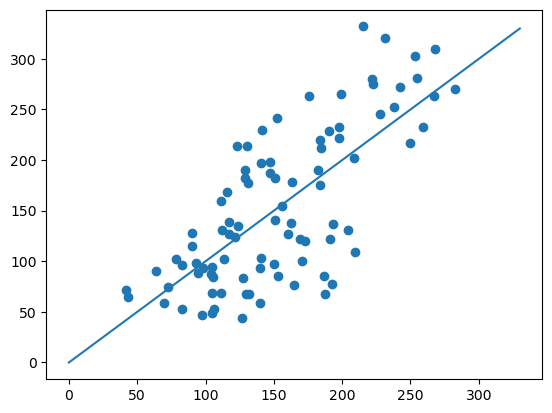

In [95]:
model = LinearRegression()
model.fit(X_train_pca, y_train)
print(model.score(X_test_pca, y_test))
y_pred = model.predict(X_test_pca)

plt.scatter(y_pred, y_test)
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()